In [2]:
# Import pandas 
import pandas as pd
import os
import json

In [3]:
def process_results(data):
    nested_values = ['video', 'author', 'music', 'stats', 'authorStats', 'challenges', 'duetInfo', 'textExtra', 'stickersOnItem']
    skip_values = ['challenges', 'duetInfo', 'textExtra', 'stickersOnItem']

    # Create blank dictionary
    flattened_data = {}
    # Loop through each video
    for idx, value in enumerate(data): 

        flattened_data[idx] = {}
        # Loop through each property in each video 
        for prop_idx, prop_value in value.items():
            # Check if nested
            if prop_idx in nested_values:
                if prop_idx in skip_values:
                    pass
                else:
                    # Loop through each nested property
                    for nested_idx, nested_value in prop_value.items():
                        flattened_data[idx][prop_idx+'_'+nested_idx] = nested_value
            # If it's not nested, add it back to the flattened dictionary
            else: 
                flattened_data[idx][prop_idx] = prop_value

    return flattened_data

In [4]:
from datetime import datetime

src_path = 'TikTok_scrape/output/'

count = 0
master_data = []

for root, dirs, files in os.walk(src_path):

    for filename in files:
        if "OrigSearch" in filename:
            # Load up data 
            with open(os.path.join(root, filename), 'r') as f:
                data = json.load(f)
                date = root.split("/")[2].replace("_fresh","")
                
                data["scrape_date"] = datetime.strptime(date, '%d%m%Y')
      
                master_data.append(data)
                
            f.close()
            
        count += 1


data_flat = process_results(master_data)
df = pd.DataFrame.from_dict(data_flat, orient='index')

print(df.head())
print(df.columns)

                    id                                               desc  \
0  7077176450138311941                       #duet with @ukraine.ball2007   
1  7068310189472042266  I would support you sir #putin  #rusia #ukrain...   
2  7077110895356153093                 #ukraine #ukraine🇺🇦 @tompeterodell   
3  7074329793659178286  The city of #Odessa has built walls of sandbag...   
4  7068781101208063275  President #Zelensky declared martial law after...   

   createTime             video_id  video_height  video_width  video_duration  \
0  1647783549  7077176450138311941           634          360              10   
1  1645719212  7068310189472042266          1024          576              60   
2  1647768286  7077110895356153093          1024          576             140   
3  1647120761  7074329793659178286          1024          576               5   
4  1645828854  7068781101208063275          1024          576              18   

  video_ratio                                     

In [5]:
groupdf = df.groupby(['scrape_date']).mean()
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
#sns.lineplot(ax=axes[0], x=groupdf.index, y=groupdf['stats_playCount'])

freq_df = pd.DataFrame(df["music_title"].value_counts()).head(15).iloc()

sns.set_theme()
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
fig.suptitle('Video Shares')

# # Bulbasaur
sns.barplot(x=freq_df.index, y=freq_df["music_title"])

<AxesSubplot:ylabel='music_title'>

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Average Video Shares each Day')]

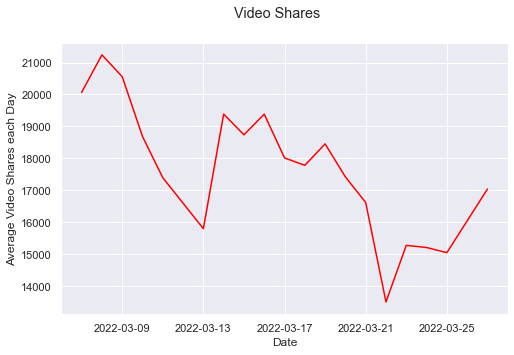

In [7]:
#sns.lineplot(ax=axes[0], x=groupdf.index, y=groupdf['stats_playCount'])
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set_theme()
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
fig.suptitle('Video Shares')

# Bulbasaur
sns.lineplot(ax=ax, x=groupdf.index, y=groupdf['stats_shareCount'], color="red")
#axes[0].set_title(bulbasaur.name)
ax.set(xlabel='Date', ylabel='Average Video Shares each Day')


In [7]:
import sys
!{sys.executable} -m pip install wordcloud

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
%matplotlib

Using matplotlib backend: MacOSX


In [10]:

stopwords = set(STOPWORDS) 
comment_words = ' '

for val in df.desc:

   # typecaste each val to string 
    val = str(val) 

   # split the value 
    tokens = val.split(" ") 

    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
        
        tokens[i] = re.sub(r'\W+', '', tokens[i])

    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(
            background_color ='white', 
            stopwords = ["russia", "ukraine", "fyp", "foryou", "foryoupage"] + list(STOPWORDS), 
            min_font_size = 10, collocations=False).generate(comment_words) 

#print(wordcloud.words_)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 

#plt.show() 